# Split data and Train Model
- The data inputted has been explored, cleaned and normalised.

### Read in the data

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'../data/results_for_mlops.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Suburb', 'Bedrooms', 'Bathrooms', 'Address',
       'Parking Spaces', 'Price', 'Floor size', 'Type', 'URL Code'],
      dtype='object')

In [14]:
# Split data into X and y

X = df.drop(columns=['Price', 'Address', 'Type', 'Floor size', 'URL Code', 'Unnamed: 0'])
y = df['Price']

In [15]:
X.dtypes

Suburb             object
Bedrooms          float64
Bathrooms         float64
Parking Spaces    float64
dtype: object

In [18]:
# OHE and SC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHoteEncoder', cat_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [19]:
X = preprocessor.fit_transform(X)

In [20]:
X.shape

(1302, 38)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Train CatBoost

In [30]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

The hyperparameters were found using a random search. The catboost model was chosen after evaluating: Linear Regression, Lasso, Ridge, K-Neighbors Regressor, Decision Tree,Random Forest Regressor, XGBRegressor,CatBoosting Regressor, AdaBoost Regressor

In [36]:
# Train the model

model = CatBoostRegressor(depth= 4, iterations= 2000, l2_leaf_reg= 8.770442157902956, learning_rate= 0.050731176843223084)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {score}')
print(f'MAE score: {mae}')
print(f'MSE score: {mse}')

R2 Score: 0.8543486992532416
MAE score: 0.24418182145886044
MSE score: 0.11149502068226277


Text(0, 0.5, 'Predicted')

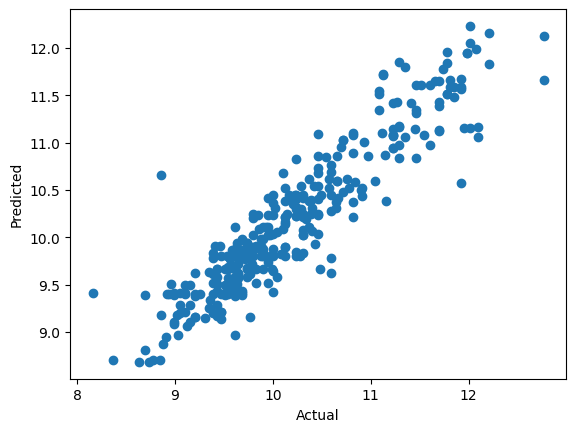

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Price'>

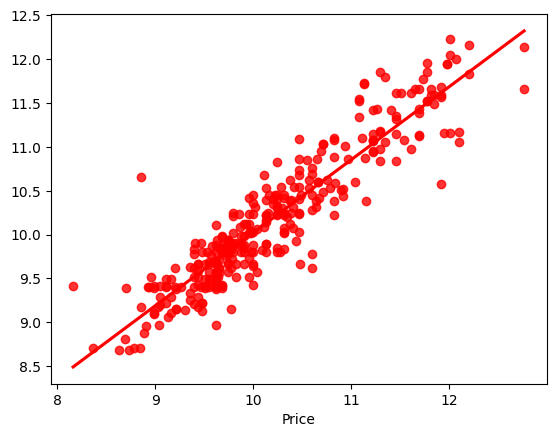

In [43]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Save the model

In [ ]:
import pickle

model_path = 'catboost_model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(model, file)

print('Model saved successfully!')